In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('LumberJack BRUTAL AtidotCom REGLOG\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom REGLOG
LumberJack Jyss (c)


In [3]:
print('Importation des librairies...')
import statistics
import pickle
#import talib
#import time
#from datetime import date,datetime
import numpy as np
import pandas as pd
#import xgboost as xgb
#from xgboost import XGBClassifier
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [4]:
simanim = pd.read_csv('dataset_ready_to_use.csv')

In [5]:
simanim.shape

(131566, 46)

In [6]:
simanim = simanim.dropna()

In [7]:
simanim.set_index('Local time', inplace=True)
# simanim = simanim.iloc[:,1:]
simanim = simanim.iloc[:,1:]
simanim.head()

,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,Volume_usdjpy,...,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd,short,long
Local time,,,,,,,,,,,,,,,,,,,,,
10.04.2004 02:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003009,37.355005,1.210666,1.209442,1.208217,0.001222,1.20888,0,1
10.04.2004 03:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003035,37.355005,1.210610,1.209471,1.208331,0.001134,1.20888,0,0
10.04.2004 04:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003060,37.355005,1.210553,1.209414,1.208275,0.001053,1.20888,0,0
10.04.2004 05:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003084,37.355005,1.210526,1.209373,1.208219,0.000978,1.20888,0,0
10.04.2004 06:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003107,37.355005,1.210429,1.209311,1.208192,0.000908,1.20888,0,0


In [8]:
#delta = round((date(simanim.index[simanim.shape[0]-1].year,\
 #                   simanim.index[simanim.shape[0]-1].month,simanim.index[simanim.shape[0]-1].day)\
  #             -date(simanim.index[0].year,simanim.index[0].month,simanim.index[0].day)).days)
delta = simanim.shape[0]
bloc1 = round(delta*0.9)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  131566
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  118409  jours 
Bloc 2 : 13157  jours


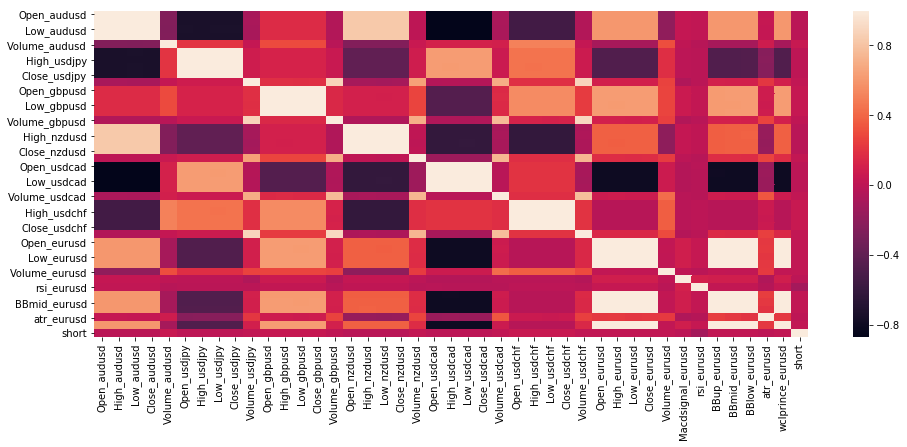

In [9]:
plt.figure(figsize=(16,6))
sns.heatmap(simanim.iloc[:,:-1].corr())
plt.show()

In [10]:
# SPLIT TRAIN ET TEST
X = simanim.iloc[:,:-1]
y = simanim.iloc[:,-1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X.iloc[:bloc1,:]
X_test = X.iloc[bloc1:,:]
y_train = y.iloc[:bloc1]
y_test = y.iloc[bloc1:]

In [14]:
import statsmodels.api as sm
logit_model=sm.Logit(y.values,X.values)
result=logit_model.fit(
    start_params=None,
    method='powell',
    maxiter=350,
    full_output=True,
    retall=True,
    disp=1,
    callback=None,
    missing='drop'
)
print(result.summary2())

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars

Optimization terminated successfully.
         Current function value: 0.035148
         Iterations: 16
         Function evaluations: 10738


/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/base/model.py:1108: RuntimeWarning: invalid value encountered in absolute
  return stats.norm.sf(np.abs(self.tvalues)) * 2
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.172    
Dependent Variable: y                AIC:              9330.6559
Date:               2019-04-19 00:23 BIC:              9731.9337
No. Observations:   131566           Log-Likelihood:   -4624.3  
Df Model:           40               LL-Null:          -5586.5  
Df Residuals:       131525           LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     16.0000                                     
-------------------------------------------------------------------
            Coef.      Std.Err.     z     P>|z|    [0.025    0.975]
-------------------------------------------------------------------
x1          -5.9893         nan    nan      nan       nan       nan
x2          -0.5706         nan    nan      nan       nan       nan
x3          -0.0240         nan    nan      nan       nan       nan
x4           0.0026         nan 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
classifier = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.001,
    C=1,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='newton-cg',
    max_iter=1000,
    multi_class='ovr',
    verbose=1,
    warm_start=False,
    n_jobs=-1,
)
classifier.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
type(y_pred),len(y_pred),len(X_test),type(X_test)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print('Accuracy de la regression logistique sue le test set: {:.2f}%'.format(classifier.score(X_test, y_test)*100))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100,'%')

In [ ]:
np.unique(y_pred, return_counts=True)

In [ ]:
backtest = simanim[['Close_eurusd','trend']]
backtest.index = simanim.index

In [ ]:
backtest.head()

In [82]:
equity = 100000
pos = 0
nb_transactions = 0
backtest_graph = pd.DataFrame()
col_equity = [100000]
col_open_pos = [0]
col_close_pos = [0]
col_is_win = [0]
col_profit = [0]
col_cours = [0]
max_gross = (0,0)
max_loss = (0,0)
trend = backtest.iloc[i,1]

for i in range (backtest.shape[0]-6):
    
    jour_0 = backtest.iloc[i,0]
    jour_1 = backtest.iloc[i+1,0]
    jour_2 = backtest.iloc[i+2,0]
    jour_3 = backtest.iloc[i+3,0]
    jour_4 = backtest.iloc[i+4,0]
    jour_5 = backtest.iloc[i+5,0]
    trend = backtest.iloc[i,1]
    
    pip_1 = (jour_1-jour_0)
    pip_2 = (jour_2-jour_0)
    pip_3 = (jour_3-jour_0)
    pip_4 = (jour_4-jour_0)
    pip_5 = (jour_5-jour_0)
    
    
    
    
    if trend == 0:
        pass
    else:
        
        if trend == 1 and pos ==0 :
            nb_transactions+=1
            price_buy = jour_0
            pos = 1
            col_open_pos.append(1)
            #col_cours.append(price_buy)
            #print('\033[94m \n',backtest.index[i])
            #print("\033[94m Ouverture de position de $100,000")
            #print("\033[94m Prix d'achat =$",price_buy)
            
            
            if pip_1 > 0.003 and pos == 1 or pip_1 < -0.0015 : 
                price_sell  = jour_1
                pos = 0
                nb_transactions+=1
                equity = equity + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_1 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\n\033[92m \n',backtest.index[i+1])
                #print("\033[92m Cloture de position")
                #print("\033[92m Prix de cloture = $",price_sell)
                #print('pnl en 1 minute : ',(price_sell-price_buy)*100000)
            elif pip_2 > 0.003 and pos == 1 or pip_2 < -0.0015 : 
                price_sell  = jour_2
                pos = 0
                nb_transactions+=1
                equity = equity + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_2 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\033[92m',backtest.index[i+2])
                #print("\033[92m Vente")
                #print("\033[92m Prix de cloture = $",price_sell)
                #print('pnl en 2 minutes ',(price_sell-price_buy)*100000)
            elif pip_3 > 0.003 and pos == 1 or pip_3 < -0.0015 : 
                price_sell  = jour_3
                pos = 0
                nb_transactions+=1
                equity = equity + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_3 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\033[92m',backtest.index[i+3])
                #print("\033[92m Vente")
                #print("\033[92m Prix de cloture = $",price_sell)
                #print('pnl en 3 minutes ',(price_sell-price_buy)*100000)
            elif pip_4 > 0.003 and pos == 1 or pip_4 < -0.0015 : 
                price_sell  = jour_4
                pos = 0
                nb_transactions+=1
                equity = equity + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_4 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\033[92m',backtest.index[i+4])
                #print("\033[92m Vente")
                #print("\033[92m Prix de cloture = $",price_sell)
                #print('pnl en 4 minutes ',(price_sell-price_buy)*100000)
            else : 
                price_sell  = jour_5
                pos = 0
                nb_transactions+=1
                equity = equity + (price_sell-price_buy)*100000
                if (price_sell-price_buy)*100000 > max_gross[1]:
                    max_gross = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                elif (price_sell-price_buy)*100000 < max_loss[1]:
                    max_loss = (nb_transactions-len(col_close_pos),(price_sell-price_buy)*100000)
                col_close_pos.append(1)
                col_equity.append(equity)
                col_cours.append(price_sell)
                if pip_5 > 0:
                    col_is_win.append(1)
                    col_profit.append((price_sell-price_buy)*100000)
                else :
                    col_profit.append((price_sell-price_buy)*100000)
                    col_is_win.append(0)
                #print('\033[92m',backtest.index[i+5])
                #print("\033[92m Prix de cloture = $",price_sell)
                #print("\033[92m Nouvelle balance equity = $ \033[4m",equity)
                #print('pnl en 5 minutes ',(price_sell-price_buy)*100000)
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transactions,' transactions.' )


  Les gains faramineux s'élèvent à : $ 16353.0 !. En  5318  transactions.


In [83]:
gross_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gross_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [84]:
backtest_graph['equity'] = col_equity
backtest_graph['col_profit'] = col_profit
backtest_graph['col_is_win'] = col_is_win
backtest_graph['col_cours'] = col_cours

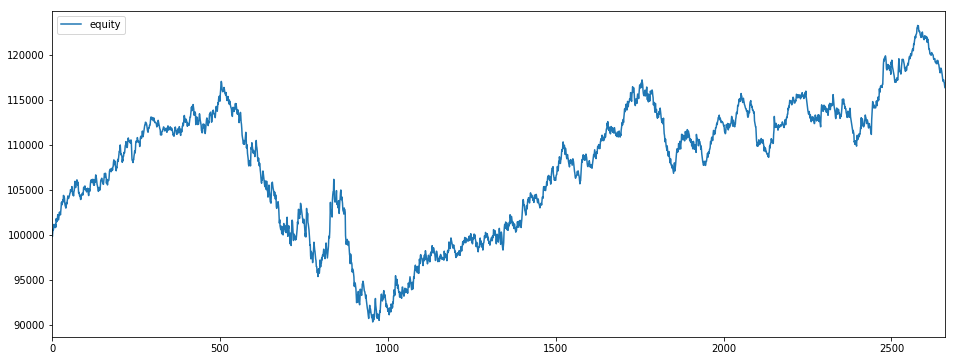

In [85]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot()
plt.legend()

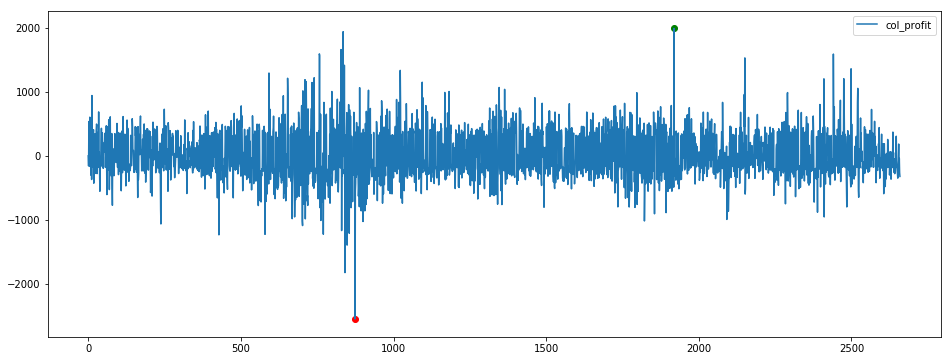

In [87]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gross[0],max_gross[1],c='g')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [88]:
print('Transaction à $100,000')
print('Gain généré',equity-100000)
print('Nombre de transactions : ',nb_transactions)
print('Nombre de positions ouvertes',sum(col_open_pos))
print('Nombre de positions fermées',sum(col_close_pos))
print('Nombre de positions gagnées',sum(col_is_win))
print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',max(col_profit),' ',max_gross[1])
print('Perte maximale',min(col_profit),' ',max_loss[1])
print('Moyenne du gain',statistics.mean(col_profit))
print('Somme de tous les gains',gross_sum)
print('Somme de tous le loss',abs(loss_sum))
print('profit factor',abs(gross_sum/loss_sum))


Transaction à $100,000
Gain généré 16353.0
Nombre de transactions :  5318
Nombre de positions ouvertes 2659
Nombre de positions fermées 2659
Nombre de positions gagnées 1169
Nombre de positions perdues 1490
Gain maximal 1991.0   1991.0
Perte maximale -2550.0   -2550.0
Moyenne du gain 6.1477443609
Somme de tous les gains 422084.0
Somme de tous le loss 405731.0
profit factor 1.04030502969


In [76]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(logit_model, open(filename, 'wb'))

129600

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)